In [7]:
import requests

res = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
#res.status_code == requests.codes.ok
#print(len(res.text))
print(res.text)

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"
15.0   8   383.0      170.0      3563.      10.0   70  1	"dodge challenger se"
14.0   8   340.0      160.0      3609.       8.0   70  1	"plymouth 'cuda 340"
15.0   8   400.0      150.0      3761.       9.5   70  1	"chevrolet monte ca

In [4]:
import sys
sys.executable
sys.path

['',
 '/usr/lib/python35.zip',
 '/usr/lib/python3.5',
 '/usr/lib/python3.5/plat-x86_64-linux-gnu',
 '/usr/lib/python3.5/lib-dynload',
 '/home/jaden/.local/lib/python3.5/site-packages',
 '/usr/local/lib/python3.5/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/jaden/.local/lib/python3.5/site-packages/IPython/extensions',
 '/home/jaden/.ipython']

In [3]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
class values:
    final_m1 = 0
    final_m2 = 0
    final_b = 0

In [5]:
def error(b, m1, m2, points):
    totalError = 0
    
    for i in range(1, len(points)):
        y = points[i,0]
        x1 = points[i,1]
        x2 = points[i,2]
        totalError += (y - ((m1 * x1) + b)) ** 2 + (y - ((m2 * x2) + b)) ** 2
    
    return totalError/float(len(points))

In [6]:
def step_gradient(b_current, m1_current, m2_current, points, learningRate):
    b_gradient = 0
    m1_gradient = 0
    m2_gradient = 0
    N = float(len(points))
    
    for i in range(1, len(points)):
        y = points[i,0]
        x1 = points[i,1]
        x2 = points[i,2]
        b_gradient += -(2/N) * ( (y - ((m1_current * x1) + b_current)) + (y - ((m2_current * x2) + b_current)) )
        m1_gradient += -(2/N) * x1 * (y - ((m1_current * x1) + b_current))
        m2_gradient += -(2/N) * x2 * (y - ((m2_current * x1) + b_current))
    
    new_b = b_current - (learningRate * b_gradient)
    new_m1 = m1_current - (learningRate * m1_gradient)
    new_m2 = m2_current - (learningRate * m2_gradient)
    
    return [new_b, new_m1, new_m2]

In [7]:
def gradient(points, starting_b, starting_m1, starting_m2, learning_rate, num_iterations):
    b = starting_b
    m1 = starting_m1
    m2 = starting_m2
    
    for i in range(num_iterations):
        print("At iteration", i, "Bias is:", b, "Slopes are:", m1, "and", m2, "Error is:", error(b, m1, m2, points))
        [b, m1, m2] = step_gradient(b, m1, m2, array(points), learning_rate)
    
    return [b, m1, m2]

In [8]:
def linearregression():
    try: 
        points = genfromtxt('cherry.tsv',delimiter="\t")
        learning_rate = 0.0001
        initial_b = 0
        initial_m1 = 0
        initial_m2 = 0
        num_iterations = 1000
        
        [values.final_b, values.final_m1, values.final_m2] = gradient(points, initial_b, initial_m1, initial_m2, learning_rate, num_iterations)
    except:
        print(e)


In [9]:
linearregression()

At iteration 0 Bias is: 0 Slopes are: 0 and 0 Error is: 358.534375
At iteration 1 Bias is: 0.00513375 Slopes are: 0.197029375 and 0.086799125 Error is: 122.149734952
At iteration 2 Bias is: 0.00685685798992 Slopes are: 0.171987695852 and 0.133986428537 Error is: 90.262679408
At iteration 3 Bias is: 0.00867219771972 Slopes are: 0.175135416856 and 0.159645482224 Error is: 76.4811075747
At iteration 4 Bias is: 0.0102904906079 Slopes are: 0.17470983038 and 0.173592978675 Error is: 69.6321425239
At iteration 5 Bias is: 0.0118328913345 Slopes are: 0.174739928144 and 0.181170730164 Error is: 66.0878320525
At iteration 6 Bias is: 0.0133299544976 Slopes are: 0.17471340253 and 0.18528388754 Error is: 64.2094400336
At iteration 7 Bias is: 0.0148027841629 Slopes are: 0.174694719402 and 0.187512627043 Error is: 63.1983113979
At iteration 8 Bias is: 0.0162622898404 Slopes are: 0.174675399371 and 0.188716415506 Error is: 62.647387012
At iteration 9 Bias is: 0.0177144775509 Slopes are: 0.174656356239 

At iteration 110 Bias is: 0.16264543118 Slopes are: 0.172761960631 and 0.188297339204 Error is: 60.7225815968
At iteration 111 Bias is: 0.164071520571 Slopes are: 0.172743321089 and 0.188279053496 Error is: 60.7101226072
At iteration 112 Bias is: 0.165497438712 Slopes are: 0.172724683786 and 0.188260769985 Error is: 60.6976667907
At iteration 113 Bias is: 0.166923185622 Slopes are: 0.172706048721 and 0.188242488669 Error is: 60.6852141467
At iteration 114 Bias is: 0.168348761322 Slopes are: 0.172687415893 and 0.188224209549 Error is: 60.6727646742
At iteration 115 Bias is: 0.169774165834 Slopes are: 0.172668785303 and 0.188205932623 Error is: 60.6603183727
At iteration 116 Bias is: 0.171199399176 Slopes are: 0.17265015695 and 0.188187657892 Error is: 60.6478752411
At iteration 117 Bias is: 0.17262446137 Slopes are: 0.172631530835 and 0.188169385356 Error is: 60.6354352789
At iteration 118 Bias is: 0.174049352436 Slopes are: 0.172612906955 and 0.188151115014 Error is: 60.6229984851
At i

At iteration 324 Bias is: 0.46395849123 Slopes are: 0.168823682024 and 0.184433820952 Error is: 58.1274316231
At iteration 325 Bias is: 0.465348397643 Slopes are: 0.168805515408 and 0.184415999193 Error is: 58.1156341354
At iteration 326 Bias is: 0.466738137149 Slopes are: 0.168787350974 and 0.184398179574 Error is: 58.1038396576
At iteration 327 Bias is: 0.468127709769 Slopes are: 0.16876918872 and 0.184380362095 Error is: 58.0920481887
At iteration 328 Bias is: 0.469517115523 Slopes are: 0.168751028648 and 0.184362546755 Error is: 58.080259728
At iteration 329 Bias is: 0.470906354432 Slopes are: 0.168732870756 and 0.184344733555 Error is: 58.0684742749
At iteration 330 Bias is: 0.472295426515 Slopes are: 0.168714715045 and 0.184326922494 Error is: 58.0566918285
At iteration 331 Bias is: 0.473684331792 Slopes are: 0.168696561514 and 0.184309113572 Error is: 58.0449123881
At iteration 332 Bias is: 0.475073070283 Slopes are: 0.168678410163 and 0.184291306788 Error is: 58.033135953
At it

At iteration 544 Bias is: 0.76575199491 Slopes are: 0.164879123833 and 0.180564142322 Error is: 55.6032033849
At iteration 545 Bias is: 0.767105660649 Slopes are: 0.164861430896 and 0.180546785251 Error is: 55.5920504282
At iteration 546 Bias is: 0.768459163834 Slopes are: 0.164843740084 and 0.180529430264 Error is: 55.5809003218
At iteration 547 Bias is: 0.769812504485 Slopes are: 0.164826051397 and 0.180512077361 Error is: 55.569753065
At iteration 548 Bias is: 0.77116568262 Slopes are: 0.164808364834 and 0.180494726541 Error is: 55.5586086572
At iteration 549 Bias is: 0.77251869826 Slopes are: 0.164790680394 and 0.180477377806 Error is: 55.5474670976
At iteration 550 Bias is: 0.773871551424 Slopes are: 0.164772998079 and 0.180460031153 Error is: 55.5363283855
At iteration 551 Bias is: 0.775224242132 Slopes are: 0.164755317886 and 0.180442686584 Error is: 55.5251925203
At iteration 552 Bias is: 0.776576770402 Slopes are: 0.164737639817 and 0.180425344098 Error is: 55.5140595011
At it

At iteration 770 Bias is: 1.06758432548 Slopes are: 0.160934058159 and 0.176693965843 Error is: 53.1537843878
At iteration 771 Bias is: 1.06890174588 Slopes are: 0.160916838963 and 0.176677073519 Error is: 53.1432580012
At iteration 772 Bias is: 1.07021900808 Slopes are: 0.160899621835 and 0.176660183224 Error is: 53.1327343098
At iteration 773 Bias is: 1.0715361121 Slopes are: 0.160882406774 and 0.176643294956 Error is: 53.122213313
At iteration 774 Bias is: 1.07285305796 Slopes are: 0.160865193781 and 0.176626408717 Error is: 53.1116950101
At iteration 775 Bias is: 1.07416984567 Slopes are: 0.160847982855 and 0.176609524506 Error is: 53.1011794005
At iteration 776 Bias is: 1.07548647526 Slopes are: 0.160830773995 and 0.176592642323 Error is: 53.0906664835
At iteration 777 Bias is: 1.07680294673 Slopes are: 0.160813567202 and 0.176575762166 Error is: 53.0801562584
At iteration 778 Bias is: 1.07811926013 Slopes are: 0.160796362475 and 0.176558884037 Error is: 53.0696487245
At iteration

In [14]:
points=genfromtxt('cherry.tsv',delimiter="\t")

In [15]:
type(points[1,0])

numpy.float64

In [16]:
len(points)

32

In [26]:
import numpy

print("Final bias is: ",values.final_b)
print("Final slopes: ",values.final_m1, values.final_m2)

y_pred=[]
y_true=[]
x1_val=[]
x2_val=[]

# Calculate Predicted Values
# points=genfromtxt('data.csv',delimiter=",")
for i in range(0, len(points)):
    x1 = points[i,1]
    x2 = points[i,2]
    
    x1_val.append(points[i,1])
    x2_val.append(points[i,2])
    
    y_pred.append(values.final_m1 * x1 + values.final_m2 * x2 + values.final_b)
    y_true.append(points[i,0])


Final bias is:  1.36646254533
Final slopes:  0.157027603858 0.172861667777


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


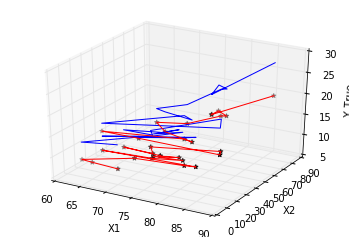

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#plt.subplot(2,1,1)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y_True')
ax.scatter(x1_val, x2_val, y_true, c = 'r', marker = '*')

ax = fig.gca(projection='3d')
ax.plot(x1_val, x2_val, y_pred)
ax.legend()

ax.plot(x1_val, x2_val, y_true, color = 'red')
ax.legend()

plt.show()
plt.show()


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


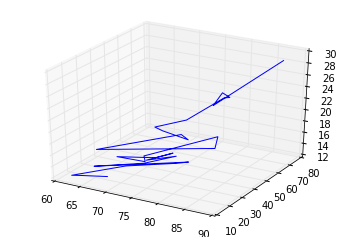

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x1_val, x2_val, y_pred)
ax.legend()

plt.show()

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


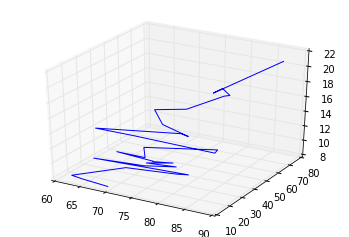

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x1_val, x2_val, y_true)
ax.legend()

plt.show()